In [1]:
df_pre.describe().T

NameError: name 'df_pre' is not defined

In [2]:
# IMPORT CONFIGs
import os
import sys
sys.path.insert(0, '../')
sys.path.insert(0, '../scripts')

# DATA ANALYSIS & VIZ TOOLS
from copy import deepcopy

import pandas as pd
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

pd.set_option('display.width', 1000)


import numpy as np


import matplotlib.pyplot as plt
# %pylab inlineL
# pylab.rcParams['figure.figsize'] = (12, 12)
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import itertools


from pylab import rcParams
rcParams['figure.figsize'] = 7, 7


import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# from plotly.plotly import iplot
import plotly.graph_objs as go
# plotly.tools.set_credentials_file(username='d116626', api_key='rCLXowBHHQLJHHzTxSNM')
init_notebook_mode(connected=True)


# LnD
---


*Code made by [Diego Oliveira](https://github.com/d116626)

### Import required libraries

### Auxiliary functions

In [3]:
def categorical_plot(df,cols,biv=False,target='sent_to_analysis'):
    
    if len(cols)%2 == 0:
        rows = len(cols)/2
    else:
        rows = (len(cols)+1)/2
        
    if biv == False:
        fig = plt.figure(figsize=(20,6*rows))
        i=1

        for col in cols:
            fig.add_subplot(rows,2,i, title = col)
            df[col].value_counts(normalize=True, dropna=False).plot.bar(title=col)        
            i+=1
    else:
        fig = plt.figure(figsize=(20,9*rows))
        i=1
        
        for col in cols:
            
            cross=pd.crosstab(df[col],df[target])
            ax = plt.subplot(rows,2,i, title = col)
            cross.div(cross.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=ax)
            i+=1
    plt.tight_layout()
    return(plt.show())


def numerical_plot(df,cols):
    
    rows = len(cols)
    
    fig = plt.figure(figsize=(20,6*rows))
    i=1
    
    for col in cols:
        
        #distplot    
        try:
            fig.add_subplot(rows,2,i, title = col)
            sns.distplot(list(df[col]),color='steelblue',rug=True)        
        
        except:
            #nan exception
            fig.add_subplot(rows,2,i ,title = col)
            mask = df[col].notnull()
            sns.distplot(list(df[mask][col]),color='steelblue', rug=True)
        
        
        #boxplot
        fig.add_subplot(rows,2,i+1, title = col)
        df[col].plot.box()
        
        i+=2
    plt.tight_layout()
    return(plt.show())



In [4]:
def get_vol(df):
    first_name = list(df.columns)
    last_name  = list(df.loc[0])

    name = ['{}_volume'.format(first).replace('#','') for first in first_name[3:] ]

    final_name = last_name[:3]+name
    final_name = [name.lower() for name in final_name]

    df = df.drop(labels=[0], axis=0)
    df.columns = final_name
    
    cols = ['subject','idade','sexo','etiv_volume']
    
    df['sexo'] = np.where(df['sexo']=='M',1,0)
    
    df[cols[1:]] = df[cols[1:]].astype(float)
    
    return(df[cols])

def get_XH(df):
    first_name = list(df.columns)
    last_name  = list(df.loc[0])

    name = ['{}__thick_avg'.format(first).replace('#','') for first in first_name[3:] ]

    final_name = last_name[:3]+name
    final_name = [name.lower() for name in final_name]

    df = df.drop(labels=[0], axis=0)
    df.columns = final_name
    
    df['sexo'] = np.where(df['sexo']=='M',1,0)
    
    df[final_name[1:]] = df[final_name[1:]].astype(float)
    
    
    return(df)

### Import data

### Sheets
  * Volume
  * Gyri+Sulci LH
  * Gyri+Sulci RH

In [5]:
df_vol = pd.read_excel("espessura_fabiana_573.xlsx",sheet_name='Volume')
df_LH = pd.read_excel("espessura_fabiana_573.xlsx",sheet_name='Gyri+Sulci LH')
df_RH= pd.read_excel("espessura_fabiana_573.xlsx",sheet_name='Gyri+Sulci RH')


In sex:
   * Male   = 1
   * Female = 0

In [7]:
df_etiv = get_vol(df_vol)
df_lh = get_XH(df_LH)
df_rh = get_XH(df_RH)

df_lh = pd.merge(df_etiv,df_lh, how='inner', on=['subject','idade','sexo'])
df_rh = pd.merge(df_etiv,df_rh, how='inner', on=['subject','idade','sexo'])

### Get familiar with data

In [9]:
df_pre = df_lh.copy()

In [10]:
#column type numbers
df_pre.dtypes.sort_values().to_frame('feature_type').groupby(by = 'feature_type').size().to_frame('count').reset_index()

,feature_type,count
0,float64,77
1,object,1


In [11]:
def stack_bar(x_m,y_m,x_h,y_h,name):
    trace1 = go.Bar(
        x=x_m,
        y=y_m,
        name='F',
        text=y_m,
        textposition = 'auto'
    )
    trace2 = go.Bar(
        x=x_h,
        y=y_h,
        name='M',
        text=y_h,
        textposition = 'auto'
    )

    data = [trace1, trace2]
    layout = go.Layout(title=name,
        barmode='stack',
        width=400*3.18, 
        height=1.3*660,  #960
    )

    fig = go.Figure(data=data, layout=layout)
    iplot(fig, filename='stacked-bar')
#     plotly.offline.plot(fig)
    plotly.offline.plot(fig, filename = '%s.html'%name, auto_open=True)

In [17]:
bins = [0,20,30,40,50,60,70]
labels=['10-20','21-30','31-40','41-50','51-60','61-70']
df_pre['bins'] = pd.cut(df_pre['idade'], bins=bins, labels=labels, include_lowest=True)
df_pre = df_pre.sort_values(by='bins', ascending=True)


In [18]:
df_pre['bins'].value_counts()

21-30    197
31-40    122
41-50     93
51-60     85
10-20     41
61-70     35
Name: bins, dtype: int64

In [27]:
df_mean = df_pre.groupby(by=['bins','sexo'], as_index=False).mean()

In [37]:
df_mean.to_excel('espessura_media_por_faixa_etaria.xlsx', index=False)

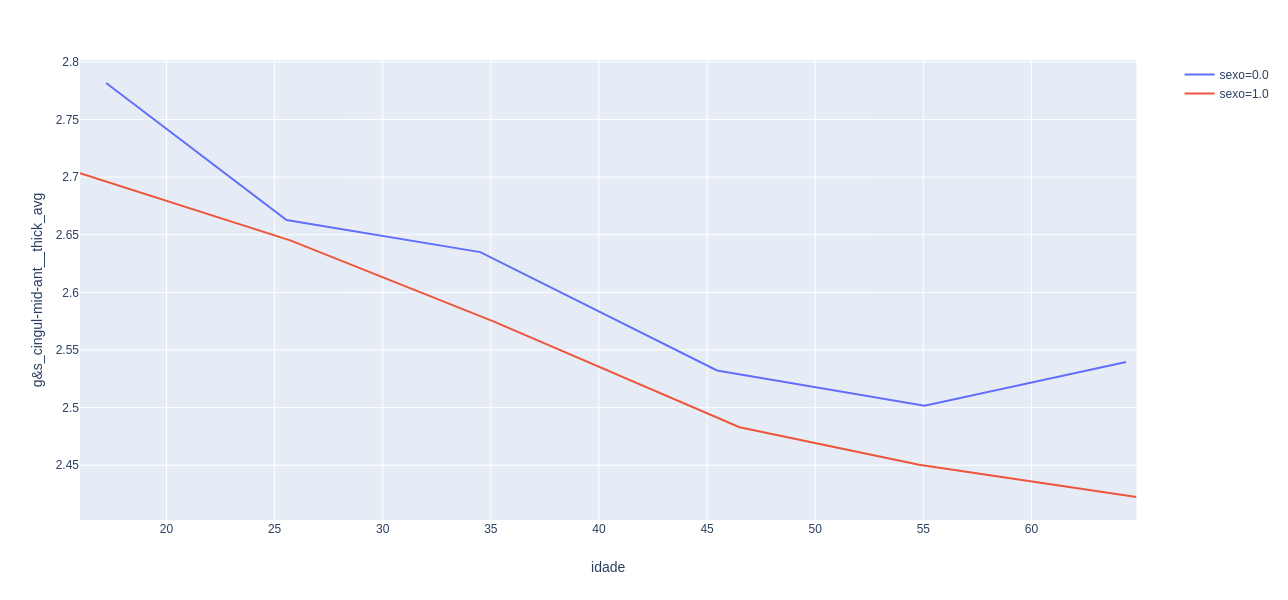

In [36]:
import plotly.express as px
mask = df_mean['sexo']==1


px.line(df_mean,x='idade',y='g&s_cingul-mid-ant__thick_avg', color='sexo')



In [11]:
# cols_ff = cols_f[:1]
# cols_ff = ['etiv_volume']
# data=[]
# for col in cols_ff:
#     trace1 = go.Scatter(
#         x = df_m['idade'],
#         y = df_m[col],
#         mode = 'markers',
#         name = 'M_{}'.format(col)
#     )
#     trace2 = go.Scatter(
#         x = df_f['idade'],
#         y = df_f[col],
#         mode = 'markers',
#         name = 'F_{}'.format(col)
#     )

#     data.append(trace1)
#     data.append(trace2)

# iplot(data, filename='scatter-mode')

In [12]:
# import plotly.figure_factory as ff

# f_et = list(df_pre['bins'].unique())
# faixa_etaria = f_et[:]

# n=3

# group_labels=[]
# hist_data   =[]

# for f in faixa_etaria:
#     mask = df_pre['bins']==f
#     df_faixaEtaria = df_pre[mask]
    
#     x = list(df_faixaEtaria[cols_f[n]])
#     g = '{} - N = {}'.format(f,len(df_faixaEtaria))
    
    
#     q75, q25,q50 = np.percentile(x, [75 ,25,50])
#     iqr = q75 - q25

#     # print ( q25, q50, q75,iqr)
#     bin_w = (2 *iqr )/ (len(x)**(1/3))



#     # Group data together
#     hist_data.append(x)

#     group_labels.append(g)

# # Create distplot with custom bin_size
# fig = ff.create_distplot(hist_data, group_labels, bin_size=0.1)

# # Plot!
# iplot(fig, filename='Distplot with Multiple Datasets')

## 2. Numerical data

20


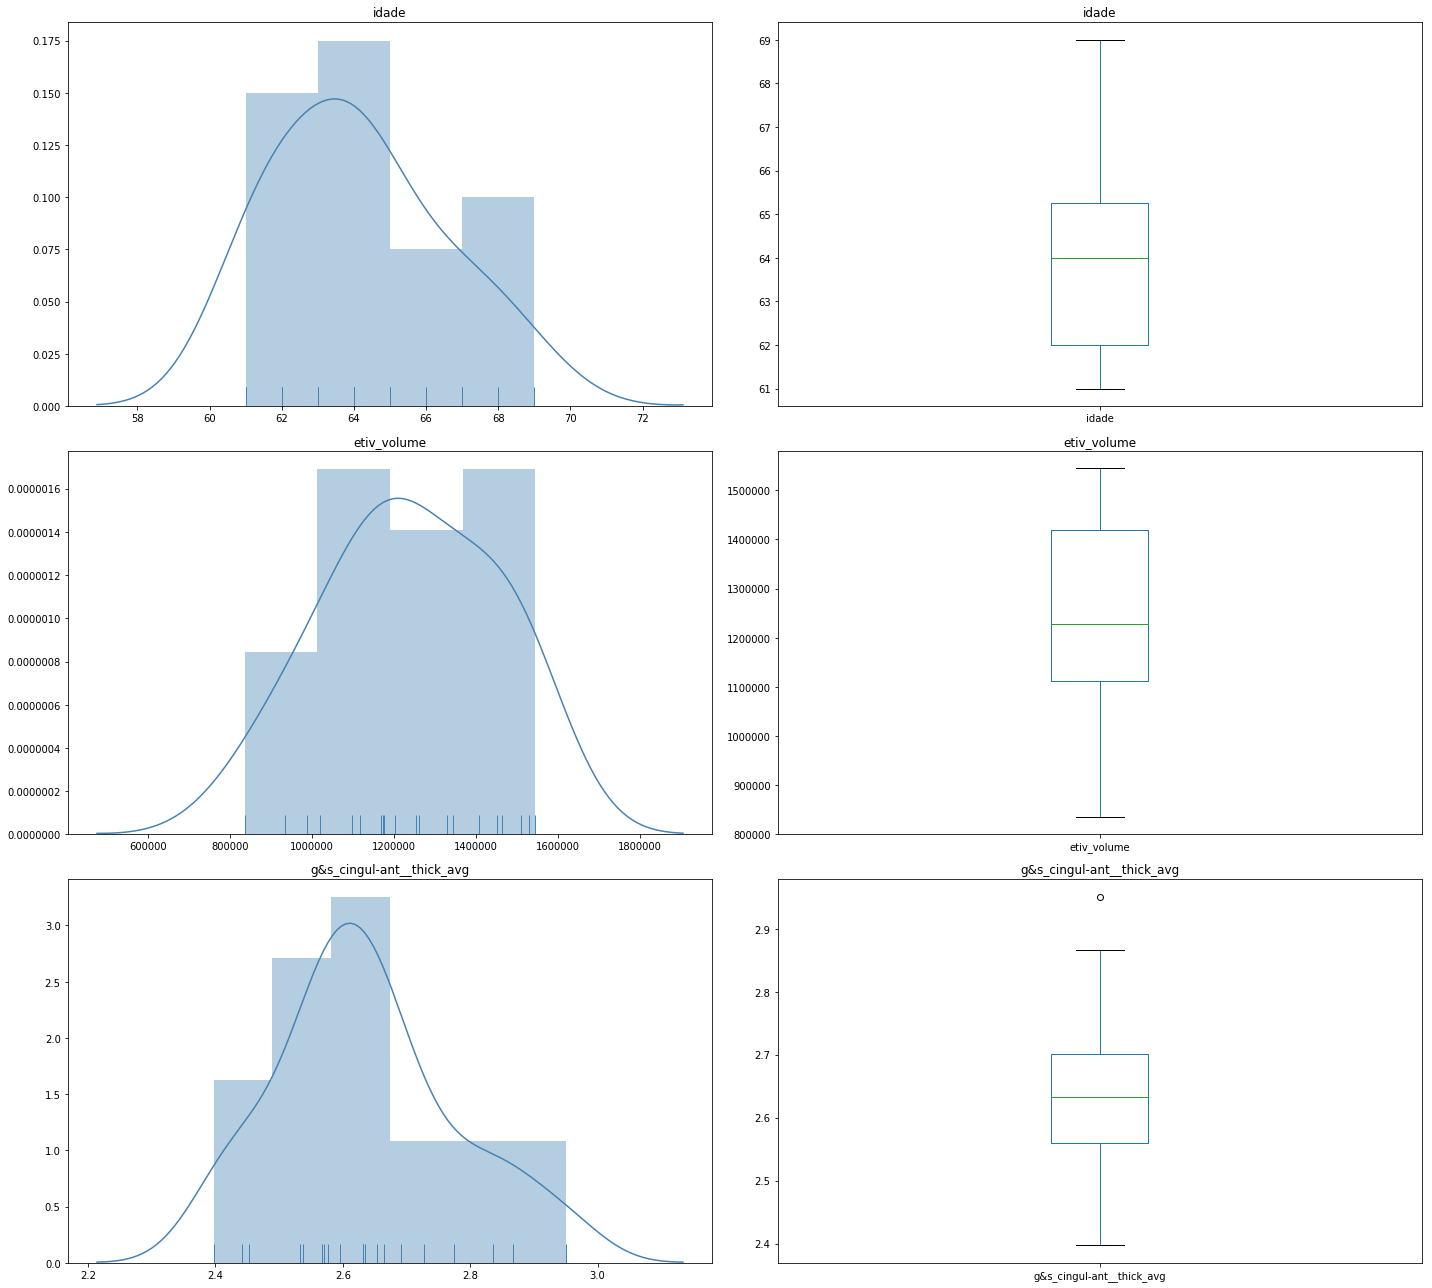

In [13]:
idade_i = 61
idade_f = 70
sex     = 0

mask = (df_pre['idade']>= idade_i) & (df_pre['idade']<idade_f) & (df_pre['sexo']==sex)

cols = ['idade','etiv_volume','g&s_cingul-ant__thick_avg']

print(len(df_pre[mask]))

numerical_plot(df_pre[mask],cols)

### Numerical Variable
Let's look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

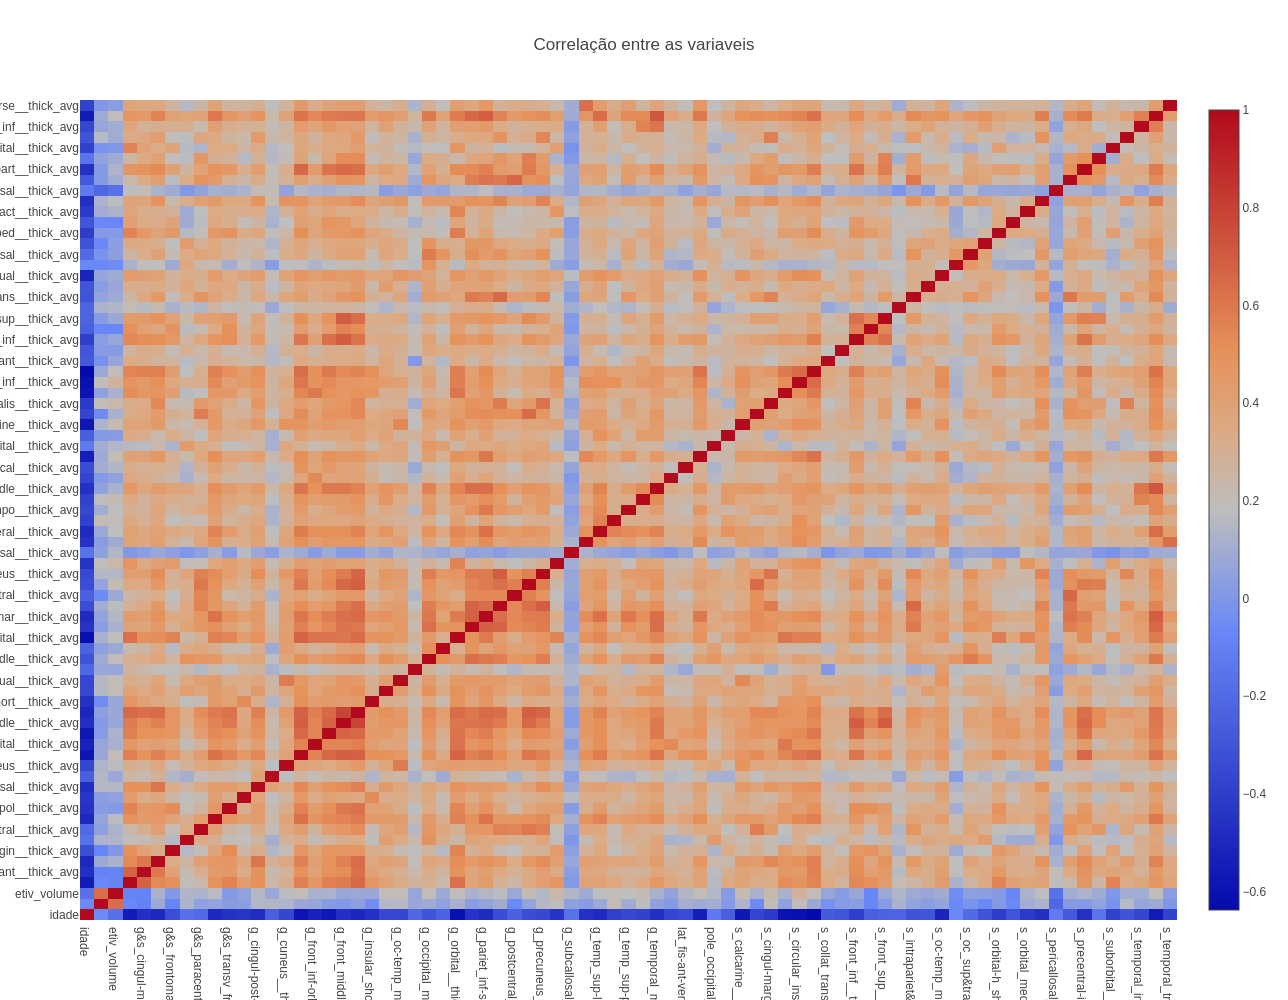

'braskem_corr_categorias.html'

In [14]:
import plotly.plotly as py
import plotly.graph_objs as go

corr_m = df_pre.corr()

colorscales = ['Greys', 'YlGnBu', 'Greens', 'YlOrRd', 'Bluered', 'RdBu',
            'Reds', 'Blues', 'Picnic', 'Rainbow', 'Portland', 'Jet',
            'Hot', 'Blackbody', 'Earth', 'Electric', 'Viridis', 'Cividis']

heatmap = go.Heatmap(z=corr_m.as_matrix(), x=corr_m.columns, y=corr_m.index,autocolorscale=True)


data=[heatmap]


#     print(df__['{}_0'.format(clas)].sum())
layout = dict(title='Correlação entre as variaveis',
             xaxis=dict(
                            autorange=True,
                            showgrid=True,
                            zeroline=False,
                            showline=False,
                            ticks='',
                            showticklabels=True
                        ),
                        yaxis=dict(
                            autorange=True,
                            showgrid=False,
                            zeroline=False,
                            showline=False,
                            ticks='',
                            showticklabels=True
                        ),
                  width=1000, 
                  height=1000,  #960
                  margin=go.layout.Margin(
#                                             l=410,
    #                                       r=50,
    #                                       b=100,
    #                                       t=100,
    #                                       pad=4
                                        ),
    #               paper_bgcolor='rgba(1,2,0,0)',
    #               plot_bgcolor='rgba(1,2,0,0)'
             )



fig = go.Figure(data=data, layout=layout)
#     plotly.offline.plot(fig)

iplot(fig, filename='horizontal-bar')
# pio.write_image(fig, 'braskem_corr_categorias.'%(OUTPUT_PATH,targ.lower(),clas))
plotly.offline.plot(fig, filename = 'braskem_corr_categorias.html', auto_open=False)

## Model Building

In [15]:
df_aux = df_pre.copy()

before start the model building we need to separate a sample of original data for test our model

we going to separate 30% for last test

* We will use scikit-learn (sklearn) for making different models which is an open source library for Python. It is one of the most efficient tool which contains many inbuilt functions that can be used for modeling in Python.

* Sklearn requires the target variable in a separate dataset. So, we will drop our target variable from the train dataset and save it in another dataset.

We will use scikit-learn (sklearn) for making different models which is an open source library for Python. It is one of the most efficient tool which contains many inbuilt functions that can be used for modeling in Python.

To learn further about sklearn, refer here: http://scikit-learn.org/stable/tutorial/index.html

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing



from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, cross_validate


In [17]:
df_aux_id = df_aux['subject']
df_aux    = df_aux.drop(columns=['subject'])

In [18]:
main_cols = df_aux.columns[:3]
y_cols    = df_aux.columns[3:]

thick_dict = {}
for i in range(len(list(y_cols))):
    thick_dict[i]=y_cols[i]

In [19]:
import pprint
# stuff.insert(0, stuff[:])
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(thick_dict)




{   0: 'g&s_cingul-ant__thick_avg',
    1: 'g&s_cingul-mid-ant__thick_avg',
    2: 'g&s_cingul-mid-post__thick_avg',
    3: 'g&s_frontomargin__thick_avg',
    4: 'g&s_occipital_inf__thick_avg',
    5: 'g&s_paracentral__thick_avg',
    6: 'g&s_subcentral__thick_avg',
    7: 'g&s_transv_frontopol__thick_avg',
    8: 'g_ins_lg&s_cent_ins__thick_avg',
    9: 'g_cingul-post-dorsal__thick_avg',
    10: 'g_cingul-post-ventral__thick_avg',
    11: 'g_cuneus__thick_avg',
    12: 'g_front_inf-opercular__thick_avg',
    13: 'g_front_inf-orbital__thick_avg',
    14: 'g_front_inf-triangul__thick_avg',
    15: 'g_front_middle__thick_avg',
    16: 'g_front_sup__thick_avg',
    17: 'g_insular_short__thick_avg',
    18: 'g_oc-temp_lat-fusifor__thick_avg',
    19: 'g_oc-temp_med-lingual__thick_avg',
    20: 'g_oc-temp_med-parahip__thick_avg',
    21: 'g_occipital_middle__thick_avg',
    22: 'g_occipital_sup__thick_avg',
    23: 'g_orbital__thick_avg',
    24: 'g_pariet_inf-angular__thick_avg',
    25: '

In [20]:
thick_avg_column = 11

X = df_aux[main_cols]
y = df_aux[y_cols[thick_avg_column]]
y_cols[thick_avg_column]

'g_cuneus__thick_avg'

Now we will train the model dataset and make predictions. But can we validate these predictions? One way of doing this is we can divide our train dataset into two parts: train and validation. We can train the model on this train part and using that make predictions for the validation part. In this way we can validate our predictions as we have the true predictions for the validation part.

We will use the train_test_split function from sklearn to divide our train dataset. So, first let us import train_test_split.

In [21]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X, y,random_state = 4,test_size=0.05)

The dataset has been divided into training and validation part. Let us import LogisticRegression and accuracy_score from sklearn and fit the logistic regression model.

In [22]:
train_x.head()

,idade,sexo,etiv_volume
24,31.0,0.0,1.264364e+06
234,31.0,1.0,1.420260e+06
459,32.0,1.0,1.613156e+06
225,51.0,1.0,1.482916e+06
421,48.0,0.0,1.244851e+06


# Linear Regression

In [23]:
n_folds = 10

def rmsle_cv(X,y,model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X)
    rmse= np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)



def train_test_validation(X_train, y_train,test_x,test_y, model, model_name,param_grid_model,kfold,score_par):

    model = GridSearchCV(estimator=model, param_grid=param_grid_model, scoring=score_par,n_jobs=-1,pre_dispatch='2*n_jobs', cv=kfold, verbose=1, return_train_score=False)


    
    ####=========================FIT AND PREDICT===========================####
    model.fit(X_train,y_train)

    print('Best score: ', model.best_score_)
    print('Best parameters set: \n', model.best_params_)
    

    print("MAE:", metrics.mean_absolute_error(list(test_y), model.best_estimator_.predict(test_x)))
    print('MSE:', metrics.mean_squared_error(list(test_y), model.best_estimator_.predict(test_x)))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(list(test_y), model.best_estimator_.predict(test_x))))
    print('R2:',metrics.r2_score(list(test_y), model.best_estimator_.predict(test_x)))

    return(model.best_estimator_)



In [24]:
from sklearn.linear_model import LinearRegression


model      = LinearRegression()
model_name ='Linear Regression'

param_grid_model  = {}

kfold = 10
score_par= 'r2'

lr = train_test_validation(train_x, train_y,test_x,test_y, model,model_name,param_grid_model,kfold,score_par)


score = rmsle_cv( train_x,train_y,lr)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))




predictions_model = pd.DataFrame(list(test_y), columns=['real'])
predictions_model['pred_ln'] = lr.predict(test_x)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Best score:  0.09924468801661539
Best parameters set: 
 {}
MAE: 0.09205542186496253
MSE: 0.011716977057720531
RMSE: 0.1082449862936872
R2: 0.0985893627501806
Stacking Averaged models score: 0.1158 (0.0118)


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.3s finished
/home/m/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



In [25]:
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
ranked_suburbs = coeff_df.sort_values("Coefficient", ascending = False)
ranked_suburbs



,Coefficient
sexo,2.050223e-02
etiv_volume,3.039555e-08
idade,-3.252255e-03


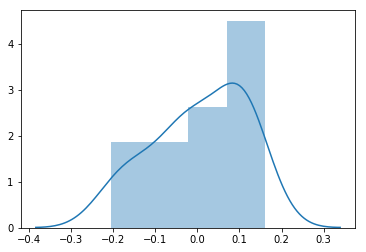

In [26]:
sns.distplot((predictions_model['real']-predictions_model['pred_ln']))

# Lasso Regression
asdkpoaskd


In [27]:
from sklearn.linear_model import LinearRegression


model      = Lasso(random_state=42)
model_name ='Lasso Regression'

param_grid_model  = {'alpha':[0.0005,0.0006,0.06,0.5,0.0001,0.01,1,2,3,4,4.4,4]}

kfold = 10
score_par= 'neg_mean_squared_error'

lss = train_test_validation(train_x, train_y,test_x,test_y, model,model_name,param_grid_model,kfold,score_par)

score = rmsle_cv( train_x,train_y,lss)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))


predictions_model['pred_lss'] = lss.predict(test_x)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Best score:  -0.013535843033645889
Best parameters set: 
 {'alpha': 0.01}
MAE: 0.09196765652943571
MSE: 0.011598104142195309
RMSE: 0.10769449448414393
R2: 0.10773449549282177
Stacking Averaged models score: 0.1157 (0.0121)


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.5s finished


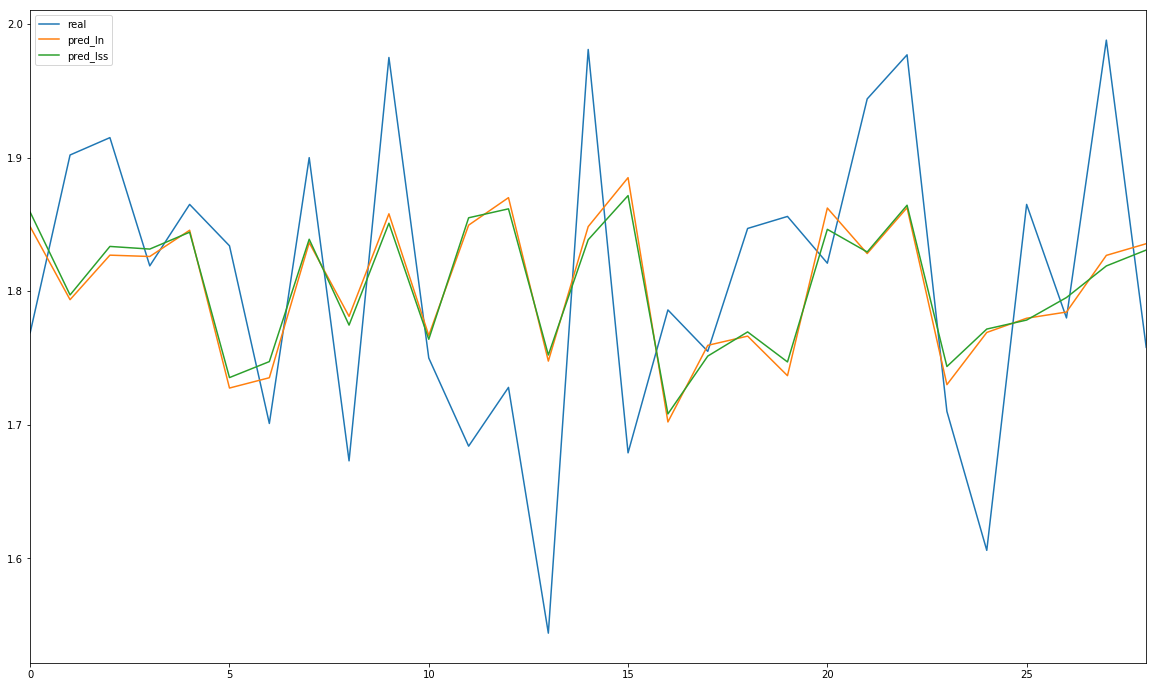

In [28]:
predictions_model.plot(figsize=(20,12))

# XGBoost

In [125]:
# import xgboost as xgb

# model      = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
#                              learning_rate=0.05, max_depth=3, 
#                              min_child_weight=1.7817, n_estimators=2200,
#                              reg_alpha=0.4640, reg_lambda=0.8571,
#                              subsample=0.5213, silent=1,
#                              random_state =7, nthread = -1)
# model_name ='XGB Regression'

# param_grid_model  = {
#     }

# kfold = 10
# score_par= 'neg_mean_squared_error'

# xgb = train_test_validation(train_x, train_y,test_x,test_y, model,model_name,param_grid_model,kfold,score_par)

# score = rmsle_cv( train_x,train_y,xgb)
# print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

# predictions_model['pred_xgb'] = xgb.predict(test_x)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.3s finished


Best score:  -0.01363274040352786
Best parameters set: 
 {}
MAE: 0.09306719405075602
MSE: 0.01220444420967023
RMSE: 0.1104737263319665
R2: 0.061087533232831004
Stacking Averaged models score: 0.1160 (0.0125)


# Gradient Boosting Regressor

In [138]:
# from sklearn.ensemble import GradientBoostingRegressor

# model= GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
#                                    max_depth=4, max_features='sqrt',
#                                    min_samples_leaf=15, min_samples_split=10, 
#                                    loss='huber', random_state =5)


# model_name ='GBRegression'

# param_grid_model  = {
#     }

# kfold = 10
# score_par= 'neg_mean_squared_error'

# rgb = train_test_validation(train_x, train_y,test_x,test_y, model,model_name,param_grid_model,kfold,score_par)

# score = rmsle_cv( train_x,train_y,rgb)
# print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))



# predictions_model['pred_rgb'] = xgb.predict(test_x)

# LightGBM

In [139]:
# from sklearn.ensemble import GradientBoostingRegressor

# model= lgb.LGBMRegressor(objective='regression',num_leaves=5,
#                               learning_rate=0.05, n_estimators=720,
#                               max_bin = 55, bagging_fraction = 0.8,
#                               bagging_freq = 5, feature_fraction = 0.2319,
#                               feature_fraction_seed=9, bagging_seed=9,
#                               min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)


# model_name ='LightGBM'

# param_grid_model  = {
#     }

# kfold = 10
# score_par= 'neg_mean_squared_error'

# lgbm = train_test_validation(train_x, train_y,test_x,test_y, model,model_name,param_grid_model,kfold,score_par)

# score = rmsle_cv( train_x,train_y,lgbm)
# print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))


# predictions_model['pred_lgbm'] = lgbm.predict(test_x)

In [140]:
# f_model      = Lasso(alpha =0.0001, random_state=42)
# f_model.fit(train_x,train_y)
# coefficients = pd.Series(f_model.coef_, index = train_x.columns)

In [141]:
# print("Lasso picked " + str(sum(coefficients != 0)) + " variables and eliminated the other " +  str(sum(coefficients == 0)) + " variables")

In [142]:
# imp_coef = pd.concat([coefficients.sort_values()])

# plt.rcParams['figure.figsize'] = (8.0, 10.0)
# imp_coef.plot(kind = "barh")
# plt.title("Coefficients in the Lasso Model")

In [143]:
# X=train_x
# y=train_y

In [144]:
# class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
#     def __init__(self, models):
#         self.models = models
        
#     # we define clones of the original models to fit the data in
#     def fit(self, X, y):
#         self.models_ = [clone(x) for x in self.models]
        
#         # Train cloned base models
#         for model in self.models_:
#             model.fit(X, y)

#         return self
    
#     #Now we do the predictions for cloned models and average them
#     def predict(self, X):
#         predictions = np.column_stack([
#             model.predict(X) for model in self.models_
#         ])
#         return np.mean(predictions, axis=1)   

In [145]:
# averaged_models = AveragingModels(models = (lss, lr, lgbm, rgb))

# score = rmsle_cv( X,y,averaged_models)
# print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [146]:
# class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
#     def __init__(self, base_models, meta_model, n_folds=5):
#         self.base_models = base_models
#         self.meta_model = meta_model
#         self.n_folds = n_folds
   
#     # We again fit the data on clones of the original models
#     def fit(self, X, y):
#         self.base_models_ = [list() for x in self.base_models]
#         self.meta_model_ = clone(self.meta_model)
#         kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
#         # Train cloned base models then create out-of-fold predictions
#         # that are needed to train the cloned meta-model
#         out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
#         for i, model in enumerate(self.base_models):
#             for train_index, holdout_index in kfold.split(X, y):
#                 instance = clone(model)
#                 self.base_models_[i].append(instance)
#                 instance.fit(X[train_index], y[train_index])
#                 y_pred = instance.predict(X[holdout_index])
#                 out_of_fold_predictions[holdout_index, i] = y_pred
                
#         # Now train the cloned  meta-model using the out-of-fold predictions as new feature
#         self.meta_model_.fit(out_of_fold_predictions, y)
#         return self
   
#     #Do the predictions of all base models on the test data and use the averaged predictions as 
#     #meta-features for the final prediction which is done by the meta-model
#     def predict(self, X):
#         meta_features = np.column_stack([
#             np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
#             for base_models in self.base_models_ ])
#         return self.meta_model_.predict(meta_features)

In [147]:
# stacked_averaged_models = StackingAveragedModels(base_models = (lss, lgbm, rgb),
#                                                  meta_model = lr)

# score = rmsle_cv( X,y,averaged_models)
# print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))
